# Hypergraphs

## Goal: Represent a hypergraph in a data structure that allows for isomorphism testing with another hypergraph.

### What is a "hypergraph"?

Whereas a standard graph is a set of "edges" that connect two "nodes," a hypergraph is a more generalized version that allows for an *arbitrary number* of nodes to be connected by--or "contained within"--an edge.

### What is the problem?

Hypergraphs don't seem to be as popularly explored in the literature. That is, there doesn't appear to be much in the way of libraries that already deal with hypergraphs. For example, NetworkX, a commonly used library for graph exploration in Python, appears to lack functions that test for isomorphism of two hypergraphs.

In [1]:
#imports
import pandas as pd
import numpy as np
import networkx as nx
%matplotlib inline

ModuleNotFoundError: No module named 'pandas'

### Initial attempt with some thrown together functions gathered online


In [2]:
import random
import math
import itertools

def generate_hypergraph(n=6, number_of_edges=None, k=3):
    vertices = range(1, n + 1)
    if number_of_edges is None:
        number_of_edges = int(math.sqrt(n))
    hyper_edges = random.sample(list(itertools.combinations(vertices, k)), number_of_edges)
    return (vertices, hyper_edges)

def convert_to_nx_biparty_graph(vertices, hyper_edges):
    G = nx.Graph()
    G.add_nodes_from(vertices)
    G.add_nodes_from(hyper_edges)
    for e in hyper_edges:
        for n in e:
            G.add_edge(n, e)
    return G

Let's try to make a hypergraph in NetworkX

In [3]:
G = nx.Graph()  # instantiate the graph
G.add_node('A')  # Add node
G.add_node('B')
G.add_edge('A', 'B', color='blue')  # Add edge--and an attribute

In [4]:
for node in G.nodes:
    print(node)
for edge in G.edges:
    print(edge)

A
B
('A', 'B')


In [5]:
# We can access the attributes later this way. This will come in handy somehow.
color = nx.get_edge_attributes(G, 'color')

for edge in G.edges:
    print(color[edge])

blue


#### So what's the problem?
The problem is that the graph algorithms in NetworkX operate on normal graphs. Specifically, the Graph class's add_edge() method expects two node names and no more.

In [6]:
GG = nx.Graph()
GG.add_node('A'); GG.add_node('B'); GG.add_node('C')
GG.add_edge('A','B','C')  # fails because of the third node

TypeError: add_edge() takes 3 positional arguments but 4 were given

#### So what's the potential solution?
We can pass in tuples of an arbitrary number of nodes (or any object we want, actually) instead.

In [7]:
GG = nx.Graph()
GG.add_node('A'); GG.add_node('B'); GG.add_node('C')
GG.add_edge(('A','B'),'C')  # Works when it is a tuple for the first argument

But this is clearly not what we want (visually, at least):

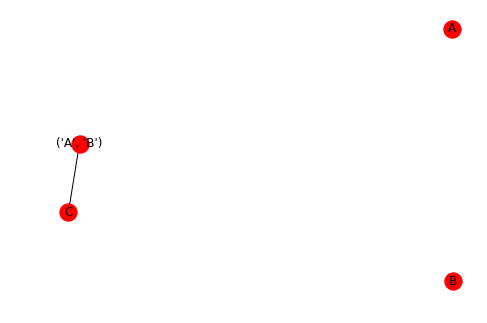

In [8]:
nx.draw(GG, with_labels=True)

So my next thought was that we could visualize them using different colors for edges. For example, a green line connecting A to C and A to B would represent the green edge containing those. Another edge, blue, connecting A to D would be a separate edge containing those.

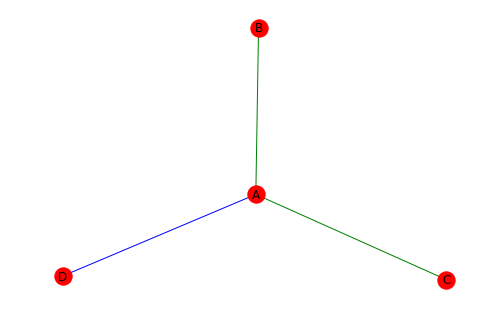

In [9]:
GG = nx.Graph()
GG.add_node('A'); GG.add_node('B'); GG.add_node('C'); GG.add_node('D')
GG.add_edge('A','C', color='g')
GG.add_edge('A', 'B', color='g')
GG.add_edge('A', 'D', color='b')

colors = [GG[u][v]['color'] for u,v in GG.edges]

nx.draw(GG, with_labels=True, edge_color=colors)

But, again, more difficulties: the nx graph plotting doesn't allow for multiple edges connecting two nodes (because nobody seems to care about hypergraphs!). So if there is overlap (which, of course, there is going to be), we will not get what we want. For example, the same green edge, except the blue edge contains C and A results in part of the green edge being overwritten by the blue.

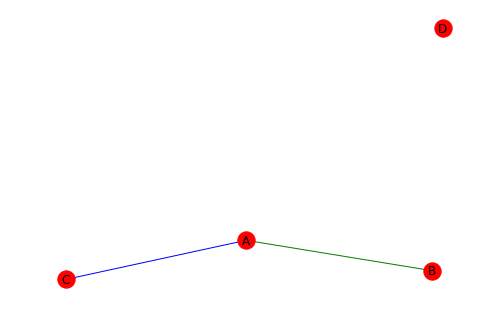

In [10]:
GG = nx.Graph()
GG.add_node('A'); GG.add_node('B'); GG.add_node('C'); GG.add_node('D')
GG.add_edge('A','C', color='g')
GG.add_edge('A', 'B', color='g')
GG.add_edge('C', 'A', color='b')

colors = [GG[u][v]['color'] for u,v in GG.edges]

nx.draw(GG, with_labels=True, edge_color=colors)

So how can we achieve this? It can probably be done in a very hackish way:

So you can understand what is going on here, I installed a popular open source visualization called "Graphviz". On your Macs (now that you have Homebrew installed ;) you can do this by typing:
```bash
brew install graphviz
```
Then, after that, I installed two python modules, pydot and pygraphviz. First update conda:
```bash
conda update conda
```
Then install the modules:
```bash
conda install pygraphviz
conda install pydot
```
This allowed me to
* Write a .dot file, which is a description of a plot that graphviz uses to generate the plot
* Call the "neato" command-line program that draws an undirected graph

In [11]:
from networkx.drawing.nx_pydot import write_dot

G = nx.MultiGraph()
G.add_edge('A','C')
G.add_edge('A', 'B')
G.add_edge('C', 'A')
G.add_edge('C', 'D')
write_dot(G, 'multiplot.dot')

# When you preface a line with ! in Jupyter, it interprets it 
#   as a call to the bash shell, in this case calling neato, 
#   having it generate the "raw" data for an image file, 
#   which I then redirect to "multiplot.png", generating an image file
!neato -T png multiplot.dot > multiplot.png

But then you have to actually display the outputted image in the Jupyter notebook:

![title](multiplot.png)

So we have the two edges now, but we need to colorize them. I am sure there is some way to do it in the Python code itself, but just to make sure it's possible, I went in and modified the .dot file myself with a text editor. This is how it looked before:

In [12]:
!cat multiplot.dot

graph  {
A;
C;
B;
D;
A -- C  [key=0];
A -- C  [key=1];
A -- B  [key=0];
C -- D  [key=0];
}


This is how it looks now (color tags added):

In [13]:
!cat multiplot_color.dot

graph  {
A;
C;
B;
D;
A -- C  [color=red] [key=0];
A -- C  [color=blue] [key=1];
A -- B  [color=red] [key=0];
C -- D  [color=blue] [key=0];
}


In [14]:
!neato -T png multiplot_color.dot > multiplot_color.png

![title](multiplot_color.png)

#### Todo: Check to see if the could_be_isomorphic() is actually working or not with a hypergraph structure

for i in range(100):
    g1 = generate_hypergraph(number_of_edges=11)
    g2 = generate_hypergraph(number_of_edges=11)
    G1 = convert_to_nx_biparty_graph(*g1)
    G2 = convert_to_nx_biparty_graph(*g2)
    if nx.could_be_isomorphic(G1, G2):
        print('could be')
    else:
        print('can\'t be')
    if nx.is_isomorphic(G1, G2):
        print('is')
    else:
        print('is not')